In [176]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
#Load the dataset
data = pd.read_csv('Company_Data.csv')

In [178]:
# Disply the rows and columns of the dataset
data.shape

(400, 11)

In [179]:
# Display the first few rows of the dataset
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [180]:
# Display the last few rows of the dataset
data.tail()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes

In [181]:
# Check for missing values
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [182]:
# Checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [183]:
# Summary statistics
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

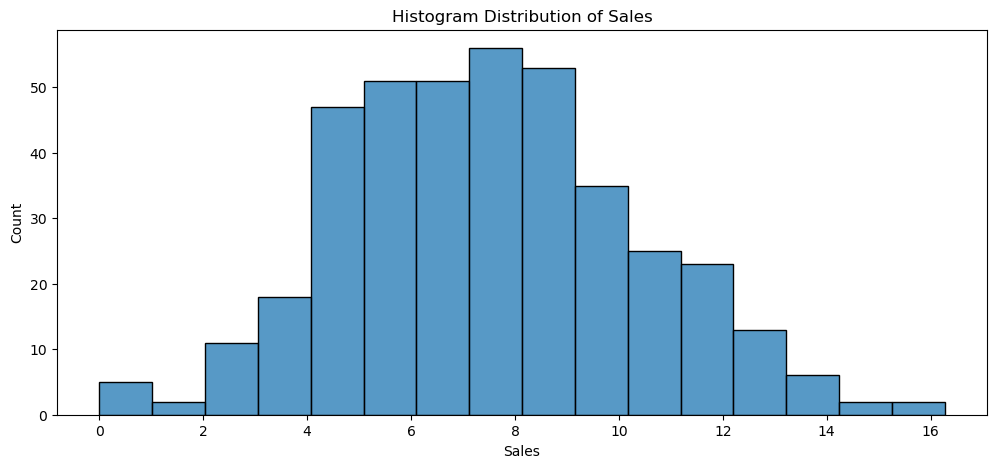

In [184]:
# Histogram of sales
fig = plt.figure(figsize=(12,5))
sns.histplot(data=data,x='Sales')
plt.title('Histogram Distribution of Sales')
plt.show()

In [185]:
# Calculating the bins
a = data.Sales.min()
b= data.Sales.max()/3
c = data.Sales.max()*2/3
d = data.Sales.max()
print(a)
print(b)
print(c)
print(d)

0.0
5.423333333333333
10.846666666666666
16.27


In [186]:
# Converting Sales into categorical variable
data['Sales'] = pd.cut(x=data['Sales'],bins=[a,b,c,d+1],labels=['Low', 'Medium', 'High'],right=False)

In [187]:
# Checking the Sales values after converstion
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0  Medium        138      73           11         276    120       Bad   42   
1    High        111      48           16         260     83      Good   65   
2  Medium        113      35           10         269     80    Medium   59   
3  Medium        117     100            4         466     97    Medium   55   
4     Low        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

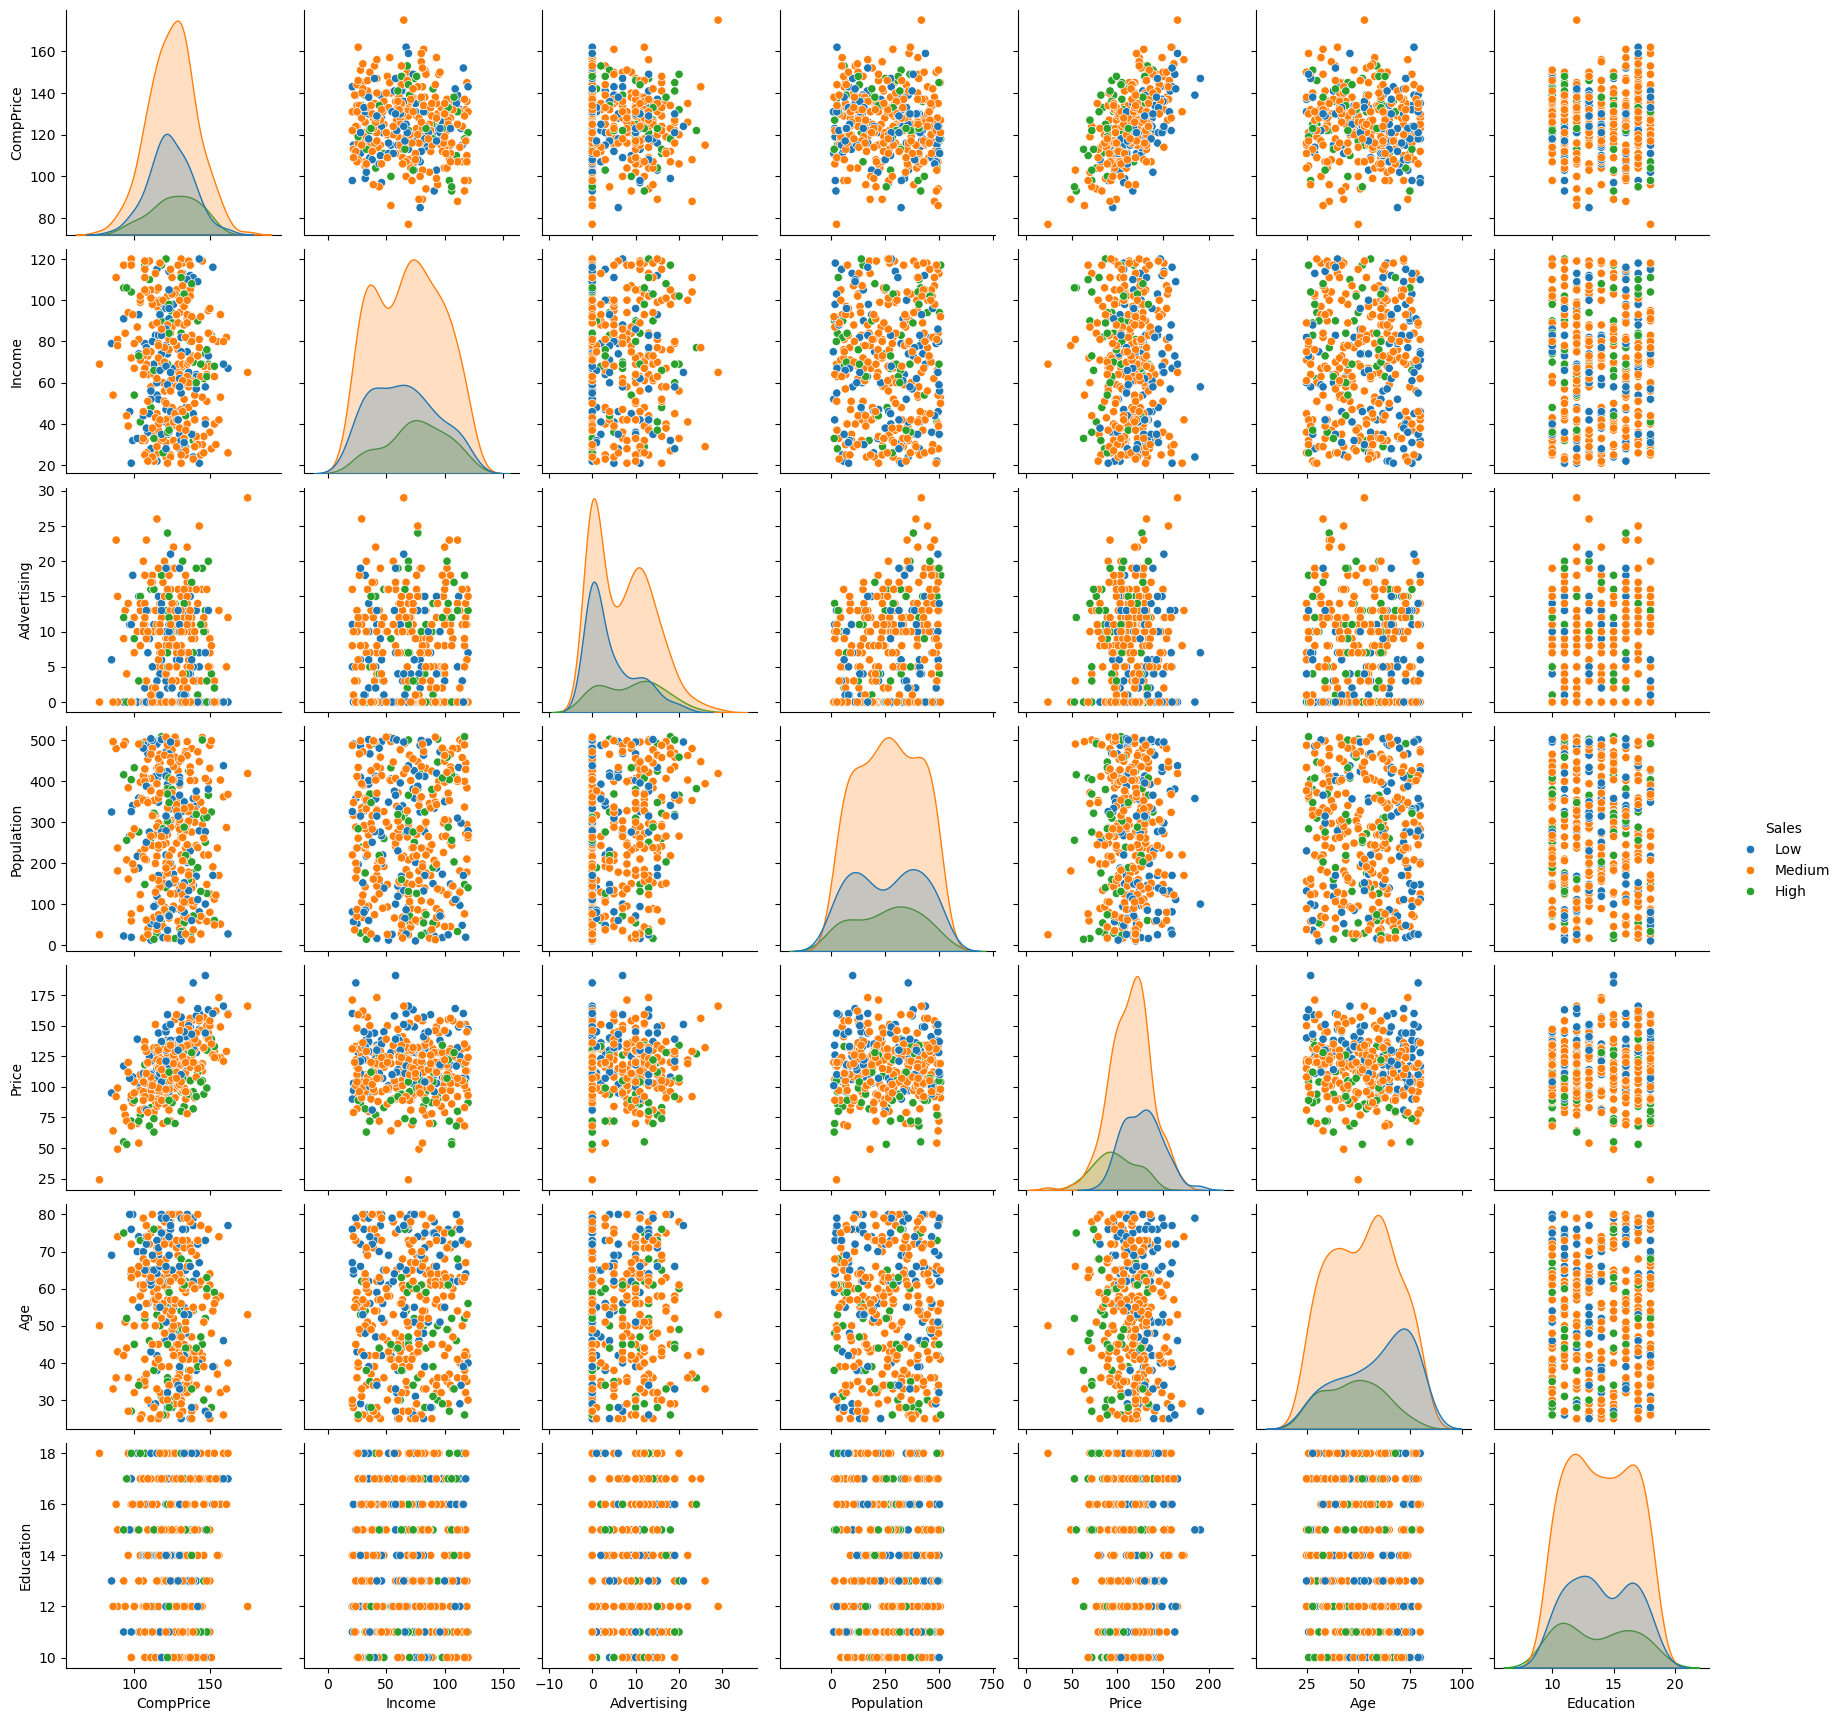

In [188]:
# Pairplot to see relationships
sns.pairplot(data,hue='Sales')
plt.show()

In [189]:
# Initilizing the LabelEncoder object
label_encoder = LabelEncoder()

In [190]:
# Label Encoding on below columns
data['Sales'] = label_encoder.fit_transform(data['Sales'])
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

In [191]:
# Checking the data after Label Encoding
data.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0      2        138      73           11         276    120          0   42   
1      0        111      48           16         260     83          1   65   
2      2        113      35           10         269     80          2   59   
3      2        117     100            4         466     97          2   55   
4      1        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

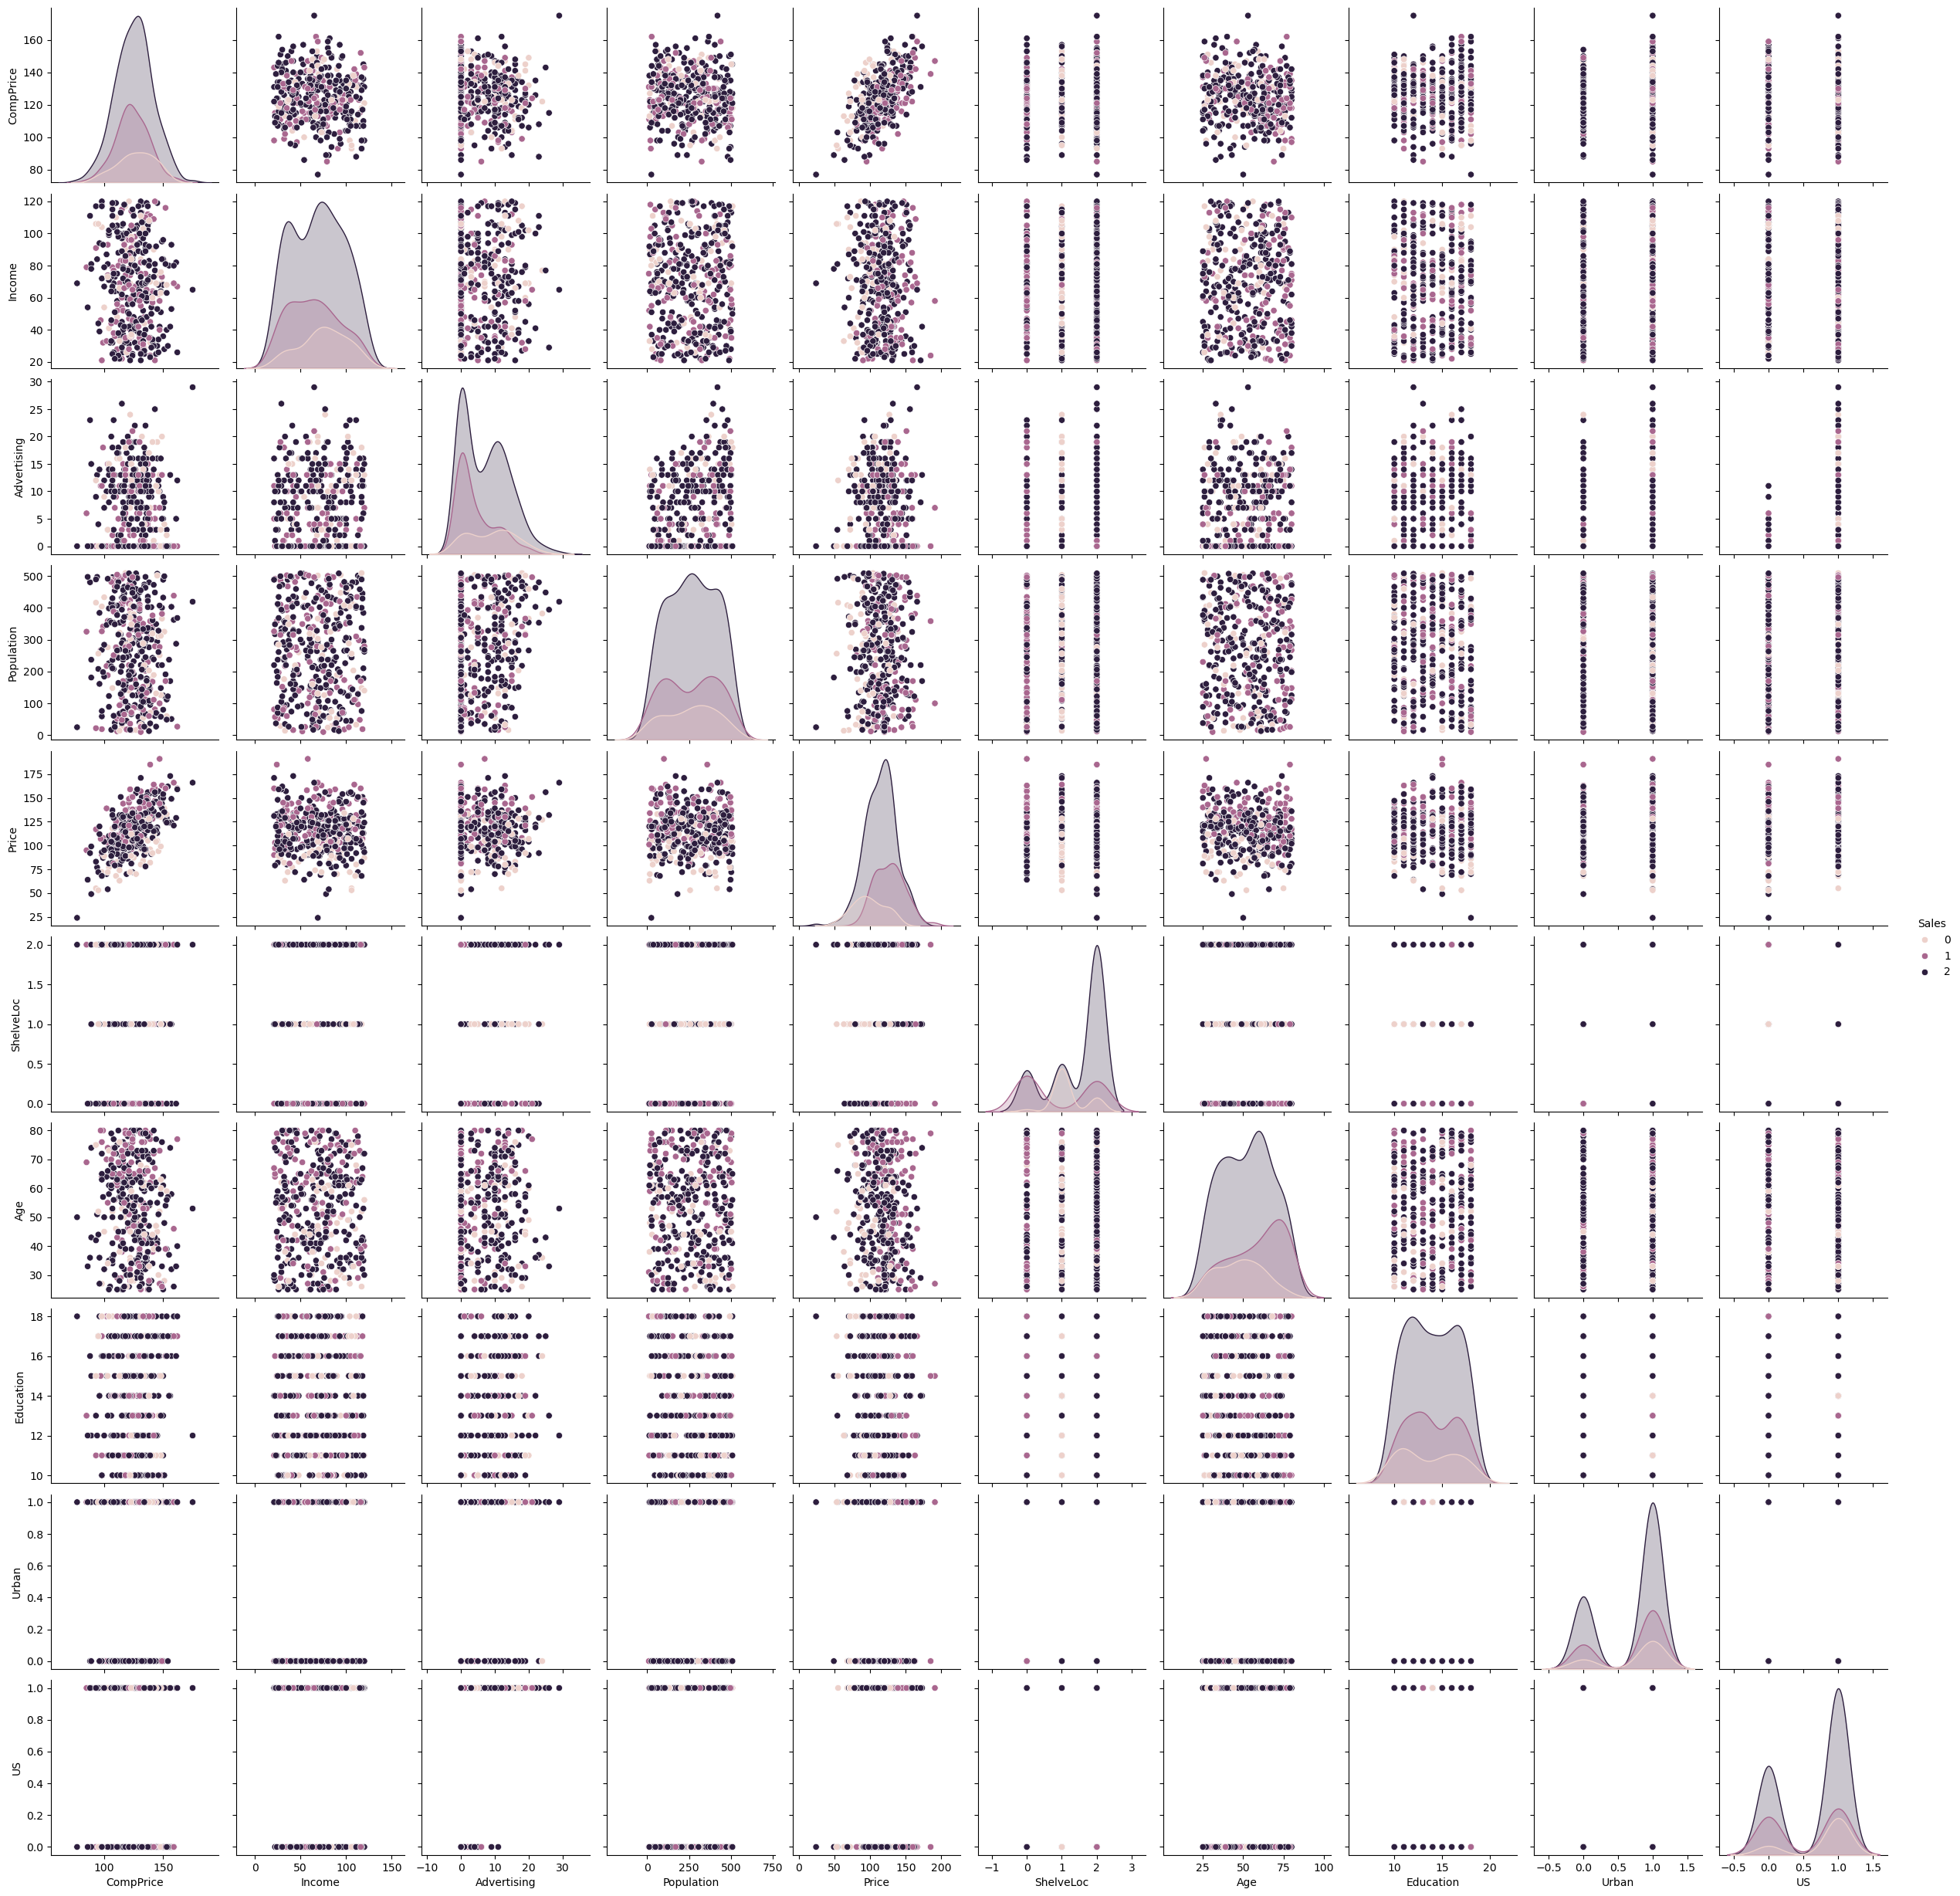

In [192]:
# Pairplot to see relationships
sns.pairplot(data,hue='Sales')
plt.show()

In [193]:
# Checking the correlation between variables
data.corr(numeric_only=True)

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000  -0.011509 -0.039131     0.000816    0.025202  0.088405   
CompPrice   -0.011509   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income      -0.039131  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.000816  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.025202  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price        0.088405   0.584848 -0.056698     0.044537   -0.012144  1.000000   
ShelveLoc    0.214414   0.023350 -0.067678     0.008544   -0.044772  0.014633   
Age          0.002346  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education    0.030381   0.025197 -0.056855    -0.033594   -0.106378  0.011747   
Urban       -0.032248   0.066594  0.037967     0.042035   -0.052025  0.047016   
US          -0.047204   0.016869  0.089601     0.684460    0.060564  0.057861   

             ShelveLoc       Age  Education     Urban        US  
Sales         0.214414  0.002346   0.030381 -0.032248 -0.047204  
CompPrice     0.023350 -0.100239   0.025197  0.066594  0.016869  
Income       -0.067678 -0.004670  -0.056855  0.037967  0.089601  
Advertising   0.008544 -0.004557  -0.033594  0.042035  0.684460  
Population   -0.044772 -0.042663  -0.106378 -0.052025  0.060564  
Price         0.014633 -0.102177   0.011747  0.047016  0.057861  
ShelveLoc     1.000000  0.056488   0.001492 -0.063978 -0.039760  
Age           0.056488  1.000000   0.006488  0.028479  0.008652  
Education     0.001492  0.006488   1.000000 -0.033094 -0.078250  
Urban        -0.063978  0.028479  -0.033094  1.000000  0.047085  
US           -0.039760  0.008652  -0.078250  0.047085  1.000000

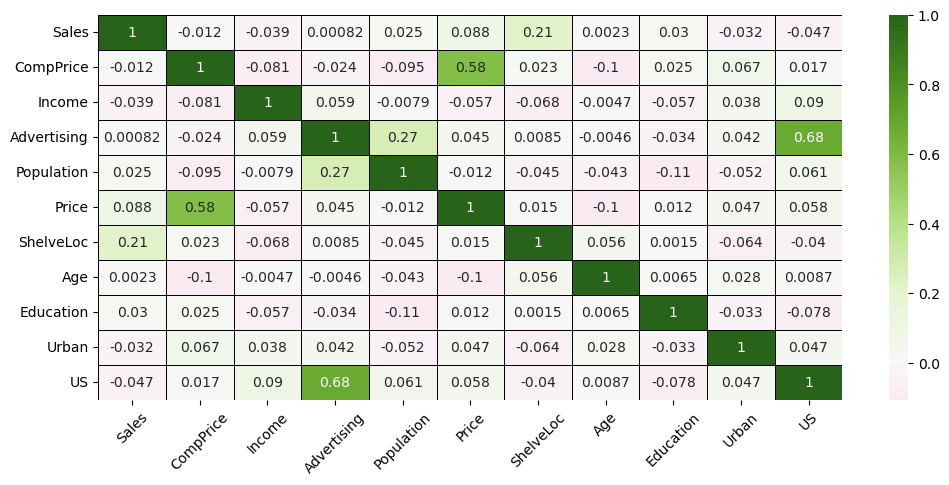

In [194]:
# Heatmap for correlation
fig = plt.figure(figsize=(12,5))
sns.heatmap(data.corr(numeric_only=True),cmap='PiYG',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.xticks(rotation=45)
plt.show()

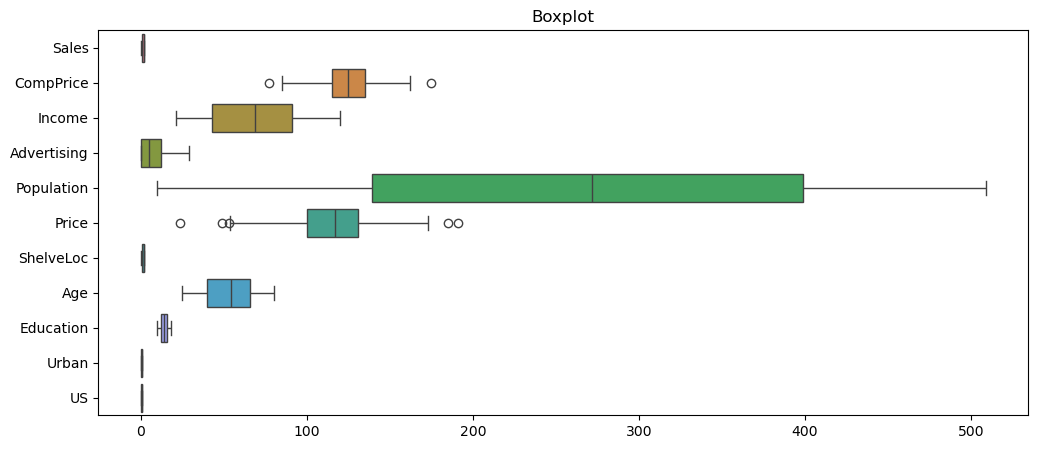

In [195]:
# Checking the outliers
plt.figure(figsize=(12,5))
sns.boxplot(data=data,orient='h')
plt.title('Boxplot')
plt.show()

In [196]:
# Define features and target variable
X = data.drop('Sales', axis=1)
y = data['Sales']

In [197]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
# Create decision tree object
dt_model = DecisionTreeClassifier(random_state=42)

In [199]:
# Train the decision tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [200]:
# Make predictions
y_pred = dt_model.predict(X_test)

In [201]:
# Evaluate the model
print(f'Accuracy of Decision Tree: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree: 0.625
Confusion Matrix:
[[ 7  0  8]
 [ 0  6 11]
 [ 2  9 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.40      0.35      0.38        17
           2       0.66      0.77      0.71        48

    accuracy                           0.62        80
   macro avg       0.61      0.53      0.56        80
weighted avg       0.63      0.62      0.62        80



In [202]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [203]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                          param_grid=param_grid, cv=5, n_jobs=1, verbose=2)

In [204]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_l

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [205]:
# Best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [206]:
# Best model
best_dt_model = grid_search.best_estimator_

In [207]:
# Evaluate the best model
y_pred_best = best_dt_model.predict(X_test)
print(f'Accuracy of Best Decision Tree: {accuracy_score(y_test, y_pred_best)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best))
print('Classification Report:')
print(classification_report(y_test, y_pred_best))

Accuracy of Best Decision Tree: 0.675
Confusion Matrix:
[[ 6  0  9]
 [ 0  9  8]
 [ 1  8 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.53      0.53      0.53        17
           2       0.70      0.81      0.75        48

    accuracy                           0.68        80
   macro avg       0.69      0.58      0.61        80
weighted avg       0.69      0.68      0.66        80



In [208]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [209]:
# Train the random forest classifier model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [210]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [211]:
# Evaluate the model
print(f'Accuracy of Random Forest: {accuracy_score(y_test, y_pred_rf)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

Accuracy of Random Forest: 0.7
Confusion Matrix:
[[ 3  0 12]
 [ 0 12  5]
 [ 1  6 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.20      0.32        15
           1       0.67      0.71      0.69        17
           2       0.71      0.85      0.77        48

    accuracy                           0.70        80
   macro avg       0.71      0.59      0.59        80
weighted avg       0.71      0.70      0.67        80



In [212]:
# Create the bagging classifier instance
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

In [213]:
# Train the bagging classifier
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [214]:
# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

In [215]:
# Evaluate the model
print(f'Accuracy of Bagging: {accuracy_score(y_test, y_pred_bagging)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_bagging))
print('Classification Report:')
print(classification_report(y_test, y_pred_bagging))

Accuracy of Bagging: 0.75
Confusion Matrix:
[[ 8  0  7]
 [ 0 12  5]
 [ 0  8 40]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.60      0.71      0.65        17
           2       0.77      0.83      0.80        48

    accuracy                           0.75        80
   macro avg       0.79      0.69      0.71        80
weighted avg       0.78      0.75      0.75        80



In [216]:
# Create the gradient boosting classifier object
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [217]:
# Train the gradient boosting classifier
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [218]:
# Make predictions
y_pred_gb = gb_model.predict(X_test)

In [219]:
# Evaluate the model
print(f'Accuracy of Gradient Boosting: {accuracy_score(y_test, y_pred_gb)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gb))
print('Classification Report:')
print(classification_report(y_test, y_pred_gb))

Accuracy of Gradient Boosting: 0.7375
Confusion Matrix:
[[ 7  0  8]
 [ 0 13  4]
 [ 2  7 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.65      0.76      0.70        17
           2       0.76      0.81      0.79        48

    accuracy                           0.74        80
   macro avg       0.73      0.68      0.69        80
weighted avg       0.74      0.74      0.73        80



In [220]:
# Compare the performance of all models
models = ['Decision Tree', 'Best Decision Tree', 'Random Forest', 'Bagging', 'Gradient Boosting']
accuracy_values = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_best),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_bagging),
    accuracy_score(y_test, y_pred_gb)
]

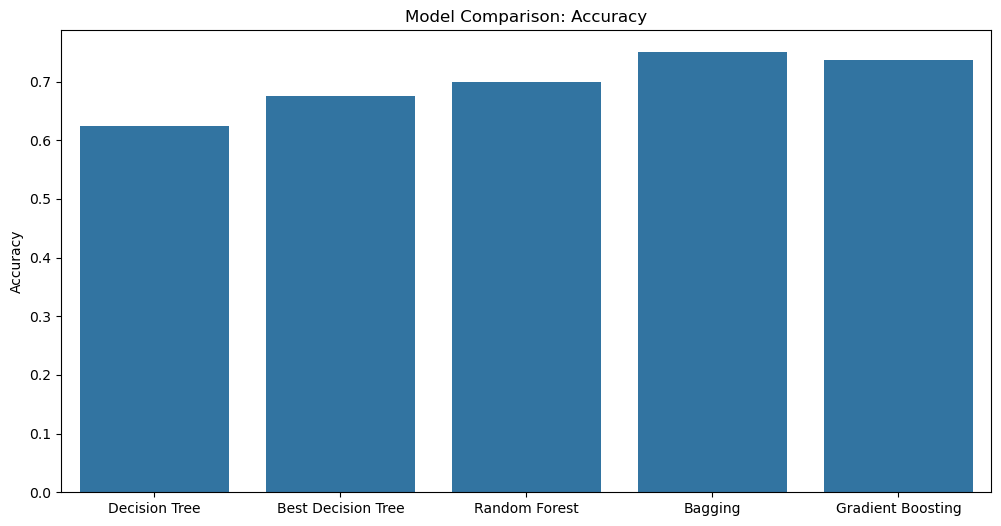

In [221]:
# Ploting the model performance
plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracy_values)
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.show()

In [222]:
# Extract feature importances from Random Forest
importances_rf = rf_model.feature_importances_

In [223]:
# Extract feature names and store in variable
feature_names = X.columns

In [224]:
# Sort feature importances for Random Forest
indices_rf = np.argsort(importances_rf)[::-1]

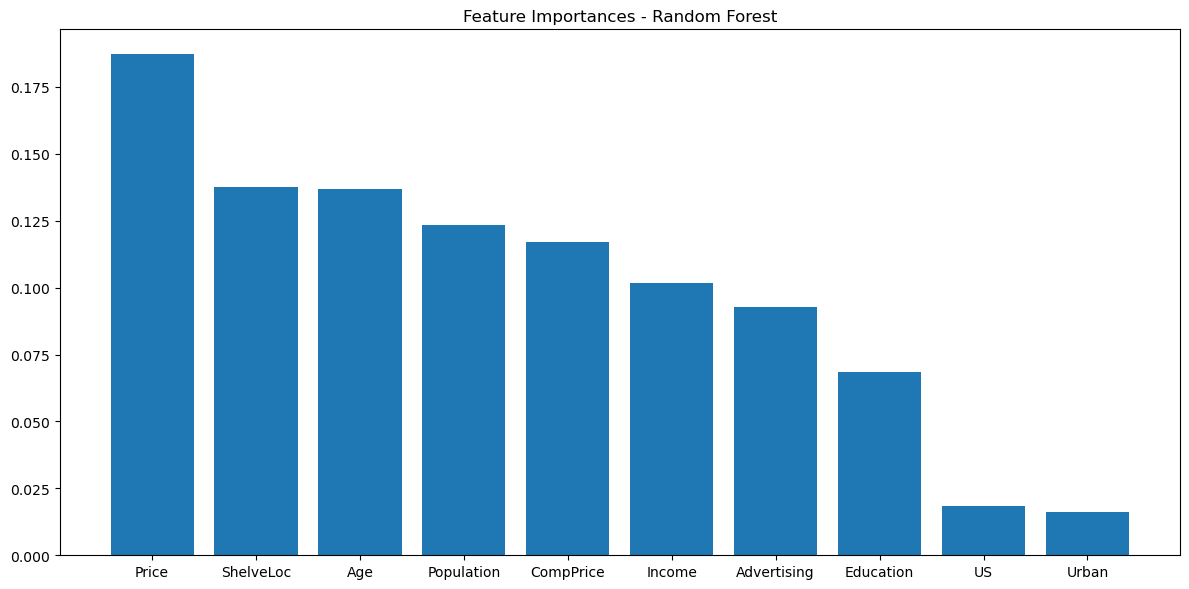

In [225]:
# Plot feature importances for Random Forest
plt.figure(figsize=(12, 6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices_rf], rotation=0)
plt.tight_layout()
plt.show()

In [226]:
# Extract feature importances from Gradient Boosting
importances_gb = gb_model.feature_importances_

In [227]:
# Sort feature importances for Gradient Boosting
indices_gb = np.argsort(importances_gb)[::-1]

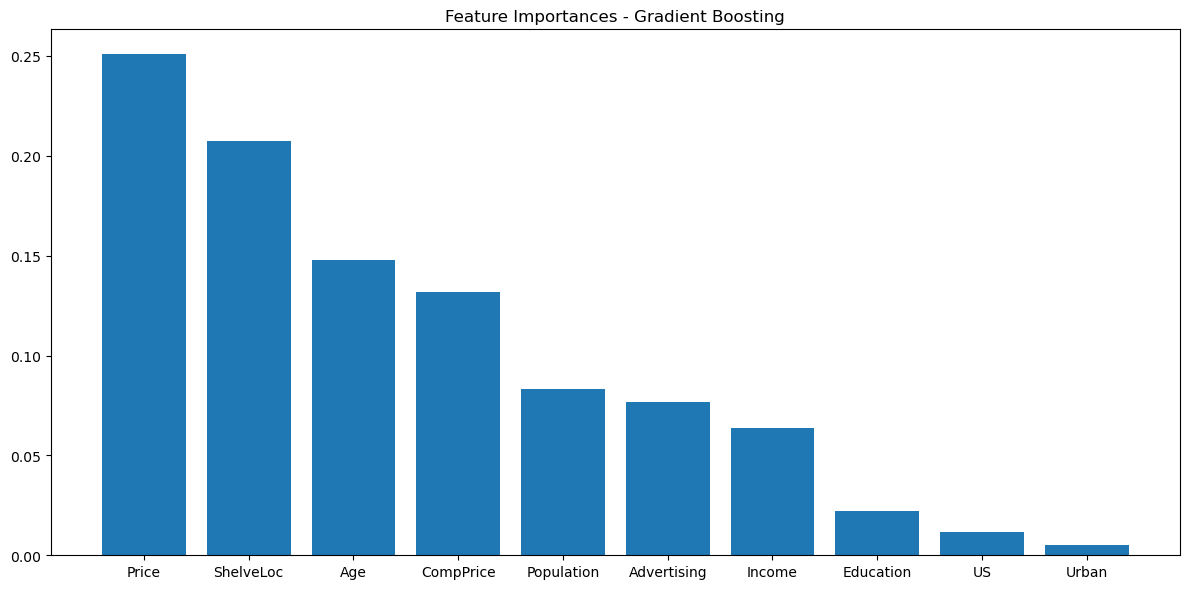

In [228]:
# Plot feature importances for Gradient Boosting
plt.figure(figsize=(12, 6))
plt.title('Feature Importances - Gradient Boosting')
plt.bar(range(X.shape[1]), importances_gb[indices_gb], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices_gb], rotation=0)
plt.tight_layout()
plt.show()

In [229]:
# Extract feature importances from Bagging
# Averaging the importances from each base estimator
importances_bagging = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)

In [230]:
# Sort feature importances for Bagging
indices_bagging = np.argsort(importances_bagging)[::-1]

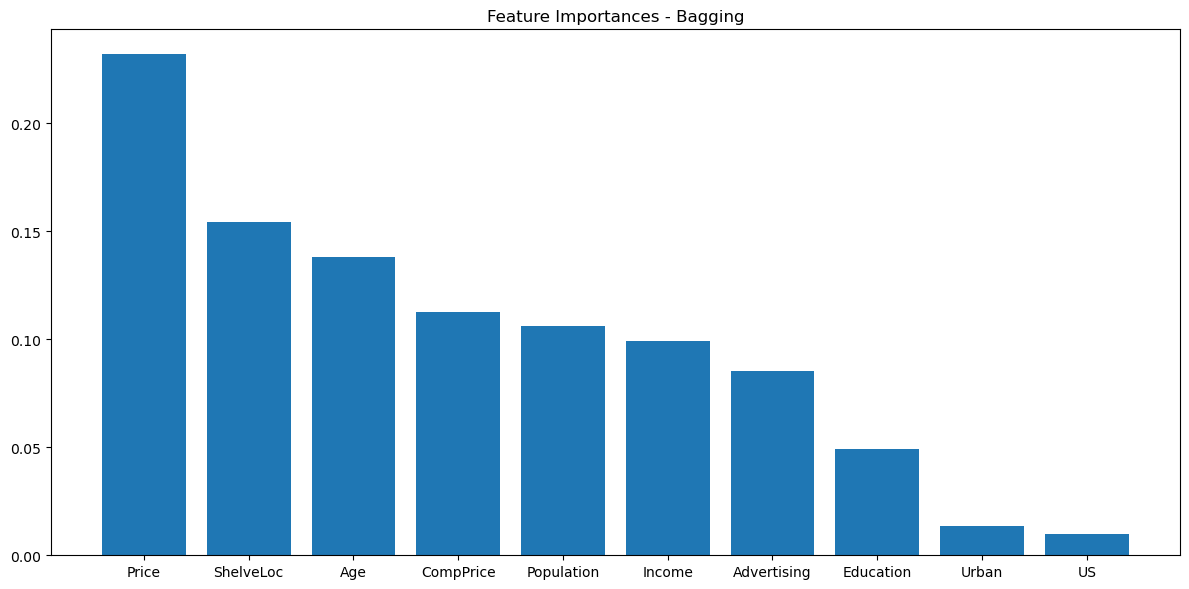

In [231]:
# Plot feature importances for Bagging
plt.figure(figsize=(12, 6))
plt.title('Feature Importances - Bagging')
plt.bar(range(X.shape[1]), importances_bagging[indices_bagging], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices_bagging], rotation=0)
plt.tight_layout()
plt.show()

In [232]:
# Price plays importatnt in sales followed by Shelveloc and Age whre Urban and US play the least